In [5]:
import pandas as pd

In [6]:
%matplotlib inline

In [7]:
file_path = '/home/aniduh/Downloads/household/household_power_consumption.txt'
df = pd.read_csv(file_path, sep=';', na_values='?', low_memory=False)

In [8]:
print(df.head())

         Date      Time  Global_active_power  Global_reactive_power  Voltage  \
0  16/12/2006  17:24:00                4.216                  0.418   234.84   
1  16/12/2006  17:25:00                5.360                  0.436   233.63   
2  16/12/2006  17:26:00                5.374                  0.498   233.29   
3  16/12/2006  17:27:00                5.388                  0.502   233.74   
4  16/12/2006  17:28:00                3.666                  0.528   235.68   

   Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  
0              18.4             0.0             1.0            17.0  
1              23.0             0.0             1.0            16.0  
2              23.0             0.0             2.0            17.0  
3              23.0             0.0             1.0            17.0  
4              15.8             0.0             1.0            17.0  


In [9]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    float64
 3   Global_reactive_power  float64
 4   Voltage                float64
 5   Global_intensity       float64
 6   Sub_metering_1         float64
 7   Sub_metering_2         float64
 8   Sub_metering_3         float64
dtypes: float64(7), object(2)
memory usage: 142.5+ MB
None


In [10]:
df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'],format='%d/%m/%Y %H:%M:%S')

In [11]:
df = df.set_index('Datetime')

In [12]:
df = df.drop(columns=['Date', 'Time'])

In [13]:
df = df.apply(pd.to_numeric, errors='coerce')

In [14]:
df = df.dropna()

In [15]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2049280 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    float64
 1   Global_reactive_power  float64
 2   Voltage                float64
 3   Global_intensity       float64
 4   Sub_metering_1         float64
 5   Sub_metering_2         float64
 6   Sub_metering_3         float64
dtypes: float64(7)
memory usage: 125.1 MB
None


In [16]:
import matplotlib.pyplot as plt

<Axes: xlabel='Datetime'>

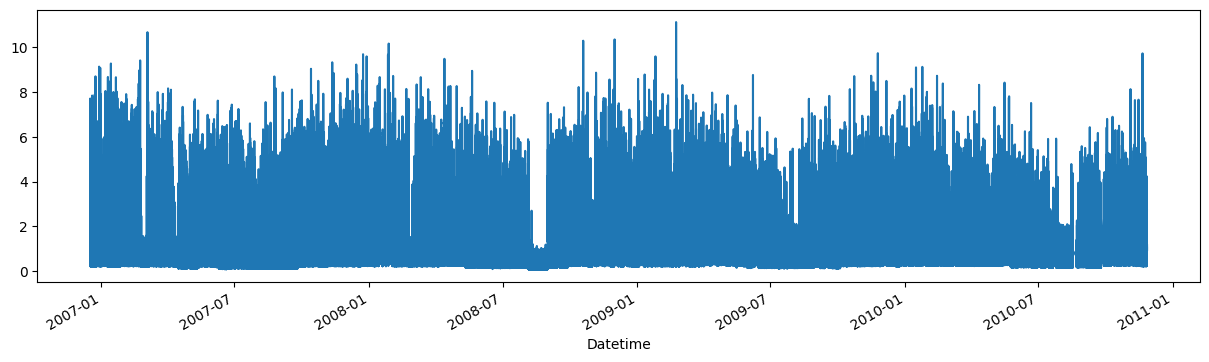

In [17]:
df['Global_active_power'].plot(figsize=(15,4))

In [18]:
print(df.head())

                     Global_active_power  Global_reactive_power  Voltage  \
Datetime                                                                   
2006-12-16 17:24:00                4.216                  0.418   234.84   
2006-12-16 17:25:00                5.360                  0.436   233.63   
2006-12-16 17:26:00                5.374                  0.498   233.29   
2006-12-16 17:27:00                5.388                  0.502   233.74   
2006-12-16 17:28:00                3.666                  0.528   235.68   

                     Global_intensity  Sub_metering_1  Sub_metering_2  \
Datetime                                                                
2006-12-16 17:24:00              18.4             0.0             1.0   
2006-12-16 17:25:00              23.0             0.0             1.0   
2006-12-16 17:26:00              23.0             0.0             2.0   
2006-12-16 17:27:00              23.0             0.0             1.0   
2006-12-16 17:28:00          

In [19]:
print(df.shape)

(2049280, 7)


In [20]:
print(df.index)

DatetimeIndex(['2006-12-16 17:24:00', '2006-12-16 17:25:00',
               '2006-12-16 17:26:00', '2006-12-16 17:27:00',
               '2006-12-16 17:28:00', '2006-12-16 17:29:00',
               '2006-12-16 17:30:00', '2006-12-16 17:31:00',
               '2006-12-16 17:32:00', '2006-12-16 17:33:00',
               ...
               '2010-11-26 20:53:00', '2010-11-26 20:54:00',
               '2010-11-26 20:55:00', '2010-11-26 20:56:00',
               '2010-11-26 20:57:00', '2010-11-26 20:58:00',
               '2010-11-26 20:59:00', '2010-11-26 21:00:00',
               '2010-11-26 21:01:00', '2010-11-26 21:02:00'],
              dtype='datetime64[ns]', name='Datetime', length=2049280, freq=None)


In [21]:
print(df['Global_active_power'].dtype)


float64


In [22]:
plt.figure(figsize=(15,4))

<Figure size 1500x400 with 0 Axes>

<Figure size 1500x400 with 0 Axes>

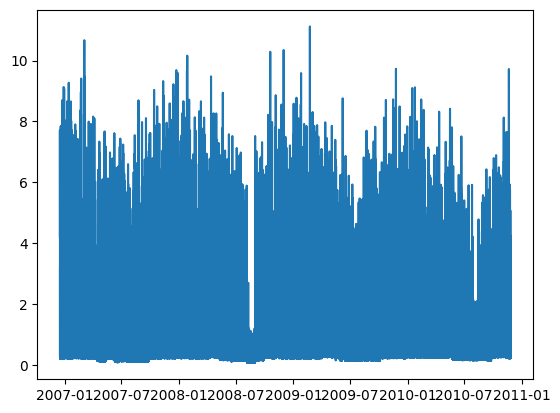

In [23]:
plt.plot(df.index, df['Global_active_power'])

In [24]:
plt.show()

Datetime
2006-12-16    3.053475
2006-12-17    2.354486
2006-12-18    1.530435
2006-12-19    1.157079
2006-12-20    1.545658
Freq: D, Name: Global_active_power, dtype: float64


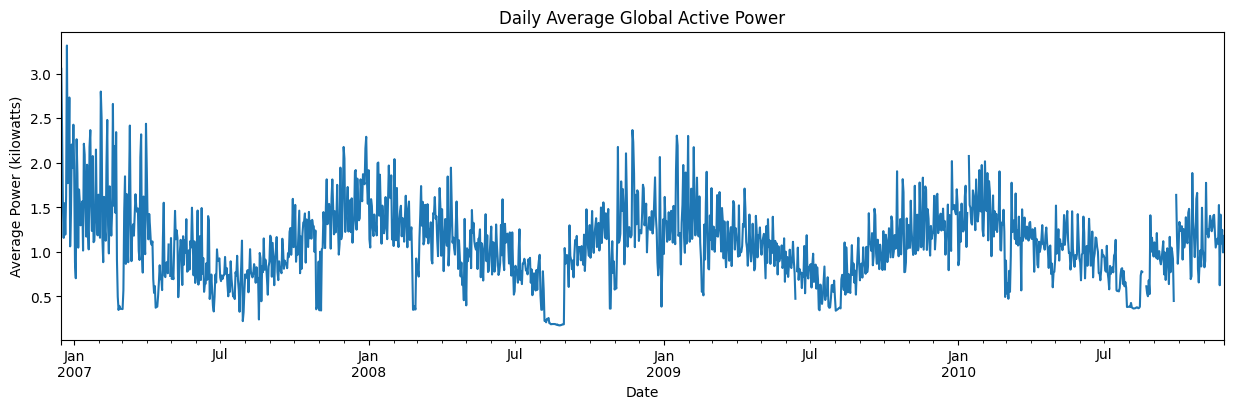

In [25]:
daily = df['Global_active_power'].resample('D').mean()
print(daily.head())

plt.figure(figsize=(15,4))
daily.plot()
plt.title('Daily Average Global Active Power')
plt.xlabel('Date')
plt.ylabel('Average Power (kilowatts)')
plt.show()


Transform your time series data into a supervised learning format. For supervised learning

In [26]:
df_supervised = pd.DataFrame()
df_supervised['t'] = daily 
df_supervised['t-1'] = daily.shift(1)
df_supervised['t-2'] = daily.shift(2)
df_supervised['t-3'] = daily.shift(3)
df_supervised['t-4'] = daily.shift(4)
df_supervised['t-5'] = daily.shift(5)

df_supervised = df_supervised.dropna()

In [27]:
split_index = int(len(df_supervised) * 0.8)
train = df_supervised.iloc[:split_index]
test = df_supervised.iloc[split_index:]

Train a baseline model- Linear Regression

In [28]:
from sklearn.linear_model import LinearRegression

In [29]:
X_train = train.drop(columns=['t'])
y_train = train['t']
X_test = test.drop(columns=['t'])
y_test = test['t']

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


In [30]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [31]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'RMSE: {rmse:.3f}')
print(f'MAE: {mae:.3f}')
print(f'R²: {r2:.3f}')


RMSE: 0.251
MAE: 0.187
R²: 0.393


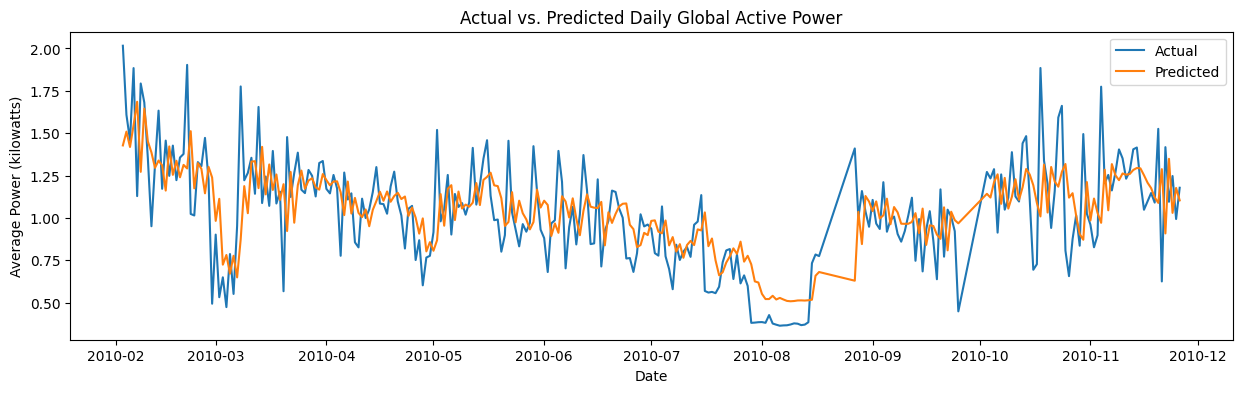

In [32]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,4))
plt.plot(test.index, y_test, label='Actual')
plt.plot(test.index, y_pred, label='Predicted')
plt.title('Actual vs. Predicted Daily Global Active Power')
plt.xlabel('Date')
plt.ylabel('Average Power (kilowatts)')
plt.legend()
plt.show()


Testing and Evaluating with Random Forest Classifier

In [33]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt


In [34]:
df_rf = pd.DataFrame()
df_rf['target'] = daily
for lag in range(1, 8): 
    df_rf[f'lag_{lag}'] = daily.shift(lag)

df_rf = df_rf.dropna()  

X = df_rf.drop(columns=['target'])
y = df_rf['target']


In [35]:
split_index = int(0.8 * len(df_rf))
X_train, X_test = X.iloc[:split_index], X.iloc[split_index:]
y_train, y_test = y.iloc[:split_index], y.iloc[split_index:]


In [36]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)


,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [37]:
y_pred = rf.predict(X_test)


In [38]:
rmse = mean_squared_error(y_test, y_pred) ** 0.5
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.3f}")
print(f"MAE: {mae:.3f}")
print(f"R²: {r2:.3f}")

RMSE: 0.247
MAE: 0.185
R²: 0.414


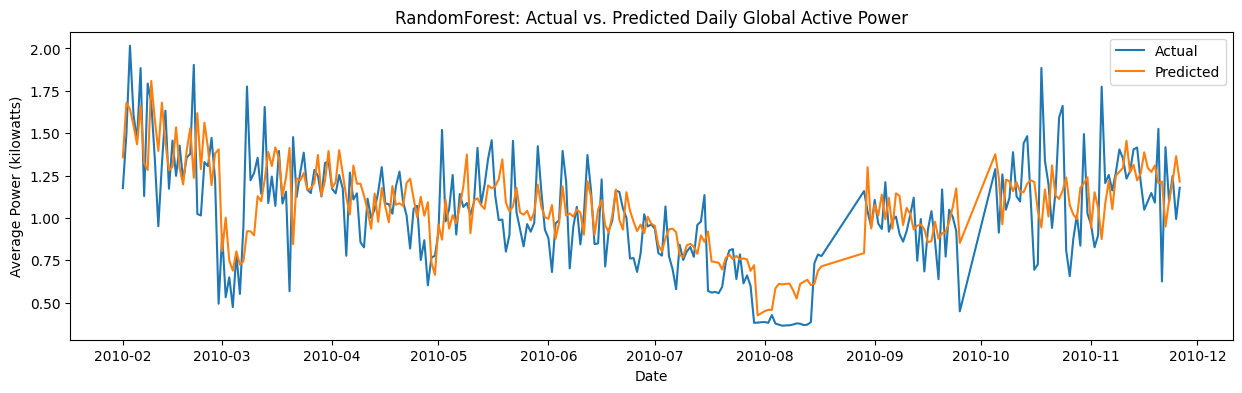

In [39]:
plt.figure(figsize=(15,4))
plt.plot(y_test.index, y_test, label='Actual')
plt.plot(y_test.index, y_pred, label='Predicted')
plt.title('RandomForest: Actual vs. Predicted Daily Global Active Power')
plt.xlabel('Date')
plt.ylabel('Average Power (kilowatts)')
plt.legend()
plt.show()


For daily household energy consumption prediction, Random Forest generally outperforms Linear Regression in both accuracy and real-world applicability. While Linear Regression offers simplicity and interpretability, it struggles to capture nonlinear relationships and sudden changes in power usage, leading to higher errors and smoother, less responsive predictions. In contrast, Random Forest handles complex patterns and irregularities in the data much better, resulting in lower error metrics (such as RMSE and MAE) and improved alignment with actual consumption trends—especially when faced with volatility, outliers, or seasonal effects. Overall, for this task, Random Forest provides more accurate and robust forecasting compared to the more basic Linear Regression approach.

In [40]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt


In [41]:
# Assuming 'daily' is your pandas Series with datetime index and daily energy usage
df_xgb = pd.DataFrame()
df_xgb['target'] = daily

# Create lag features for the past 7 days (adjust as needed)
for lag in range(1, 8):
    df_xgb[f'lag_{lag}'] = daily.shift(lag)

# Drop rows with NaN (because of lagging)
df_xgb = df_xgb.dropna()

# Define features and target
X = df_xgb.drop(columns=['target'])
y = df_xgb['target']


In [42]:
# 80% train, 20% test
split_index = int(0.8 * len(df_xgb))
X_train, X_test = X.iloc[:split_index], X.iloc[split_index:]
y_train, y_test = y.iloc[:split_index], y.iloc[split_index:]


In [43]:
model = XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    random_state=42,
    objective='reg:squarederror'
)

model.fit(X_train, y_train)


,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [44]:
y_pred = model.predict(X_test)


In [45]:
rmse = mean_squared_error(y_test, y_pred) ** 0.5
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'RMSE: {rmse:.3f}')
print(f'MAE: {mae:.3f}')
print(f'R²: {r2:.3f}')


RMSE: 0.252
MAE: 0.186
R²: 0.391


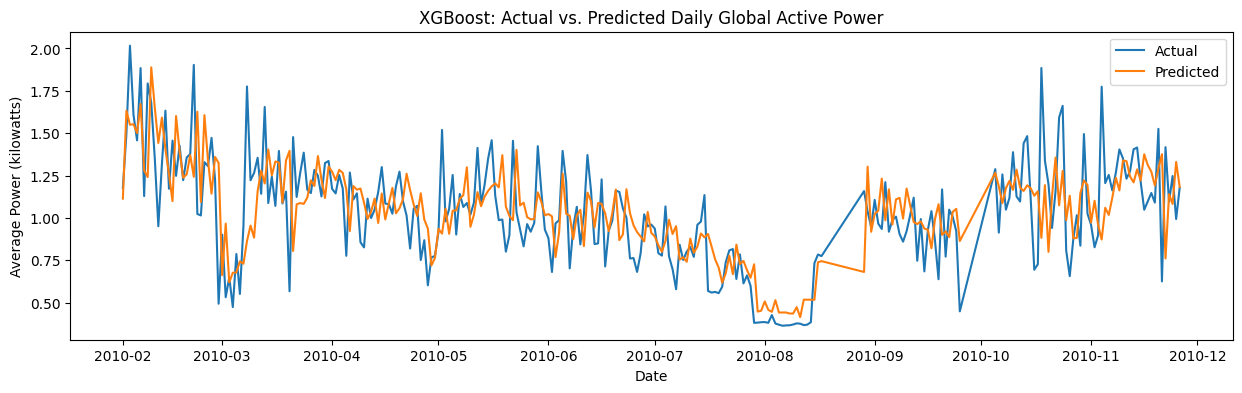

In [46]:
plt.figure(figsize=(15, 4))
plt.plot(y_test.index, y_test, label='Actual')
plt.plot(y_test.index, y_pred, label='Predicted')
plt.title('XGBoost: Actual vs. Predicted Daily Global Active Power')
plt.xlabel('Date')
plt.ylabel('Average Power (kilowatts)')
plt.legend()
plt.show()


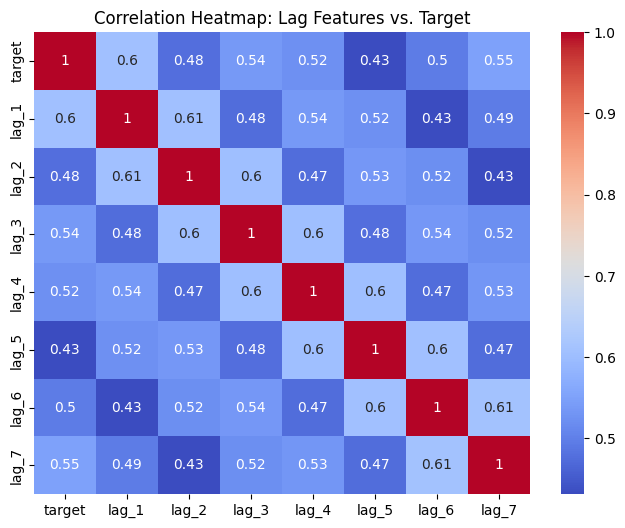

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = df_xgb.corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap: Lag Features vs. Target')
plt.show()


This heatmap visualizes the correlation between the target energy consumption and its lagged features. High correlation highlights which past days’ consumption most strongly influences the target, helping identify important predictors for your model.

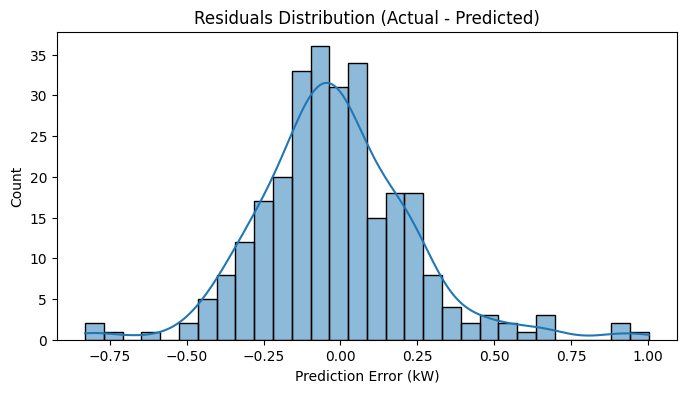

In [48]:
residuals = y_test - y_pred
plt.figure(figsize=(8,4))
sns.histplot(residuals, kde=True, bins=30)
plt.title('Residuals Distribution (Actual - Predicted)')
plt.xlabel('Prediction Error (kW)')
plt.show()


The residuals distribution plot shows the spread and shape of the prediction errors. A symmetric, centered distribution around zero indicates that the model's predictions are unbiased. Skews or heavy tails suggest systematic under- or over-prediction.

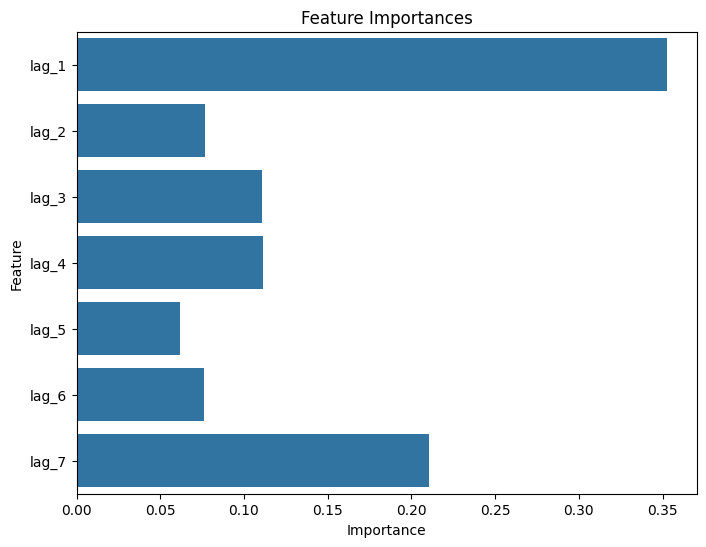

In [49]:
importances = model.feature_importances_
feature_names = X_train.columns

plt.figure(figsize=(8,6))
sns.barplot(x=importances, y=feature_names, orient='h')
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


This bar plot ranks the lag features by their contribution to the model’s predictions. Features with higher importance have a stronger influence on energy consumption forecasts, guiding you to focus on or engineer these features further.

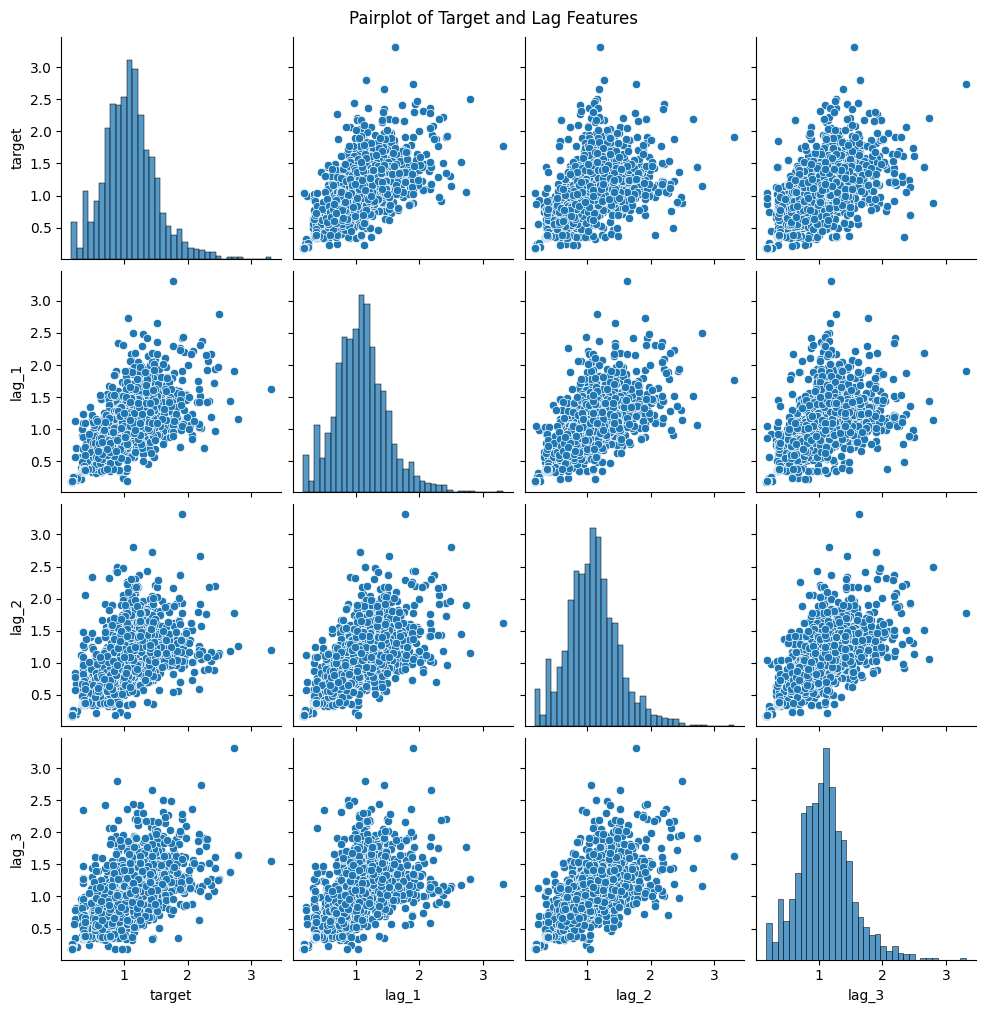

In [50]:
sns.pairplot(df_xgb[['target', 'lag_1', 'lag_2', 'lag_3']])
plt.suptitle('Pairplot of Target and Lag Features', y=1.01)
plt.show()


The pair plot allows visual exploration of relationships, trends, and potential nonlinearities between the target energy values and recent lagged features, including identifying outliers or clusters in the data.

In [51]:
df_xgb['week'] = df_xgb.index.isocalendar().week.astype(int)
df_xgb['month'] = df_xgb.index.month
df_xgb['day_of_year'] = df_xgb.index.dayofyear


In [54]:
import holidays

indian_holidays = holidays.India(years=df_xgb.index.year.unique())
df_xgb['is_holiday'] = df_xgb.index.to_series().apply(lambda x: x in indian_holidays).astype(int)


In [55]:
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Autumn'

df_xgb['season'] = df_xgb['month'].apply(get_season)
df_xgb = pd.get_dummies(df_xgb, columns=['season'])


In [56]:
print(df_xgb[['week', 'month', 'day_of_year', 'is_holiday', 'season_Winter', 'season_Spring', 'season_Summer', 'season_Autumn']].head())


            week  month  day_of_year  is_holiday  season_Winter  \
Datetime                                                          
2006-12-23    51     12          357           0           True   
2006-12-24    51     12          358           0           True   
2006-12-25    52     12          359           1           True   
2006-12-26    52     12          360           0           True   
2006-12-27    52     12          361           0           True   

            season_Spring  season_Summer  season_Autumn  
Datetime                                                 
2006-12-23          False          False          False  
2006-12-24          False          False          False  
2006-12-25          False          False          False  
2006-12-26          False          False          False  
2006-12-27          False          False          False  


In [57]:
df_ready = df_xgb.dropna()
X = df_ready.drop(columns=['target'])
y = df_ready['target']


In [58]:
split_index = int(0.8 * len(df_ready))
X_train, X_test = X.iloc[:split_index], X.iloc[split_index:]
y_train, y_test = y.iloc[:split_index], y.iloc[split_index:]


In [62]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2',None]
}

rf = RandomForestRegressor(random_state=42)
search = RandomizedSearchCV(
    rf, param_distributions=param_dist, n_iter=30, 
    cv=5, n_jobs=-1, verbose=2, scoring='neg_root_mean_squared_error'
)
search.fit(X_train, y_train)
print("Best Params:", search.best_params_)


Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] END max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.4s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.0s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.0s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.4s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=

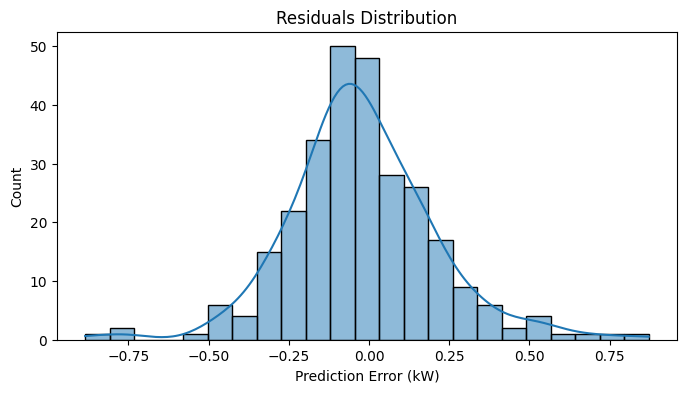

In [63]:
y_pred = search.best_estimator_.predict(X_test)
residuals = y_test - y_pred

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,4))
sns.histplot(residuals, kde=True)
plt.title('Residuals Distribution')
plt.xlabel('Prediction Error (kW)')
plt.show()


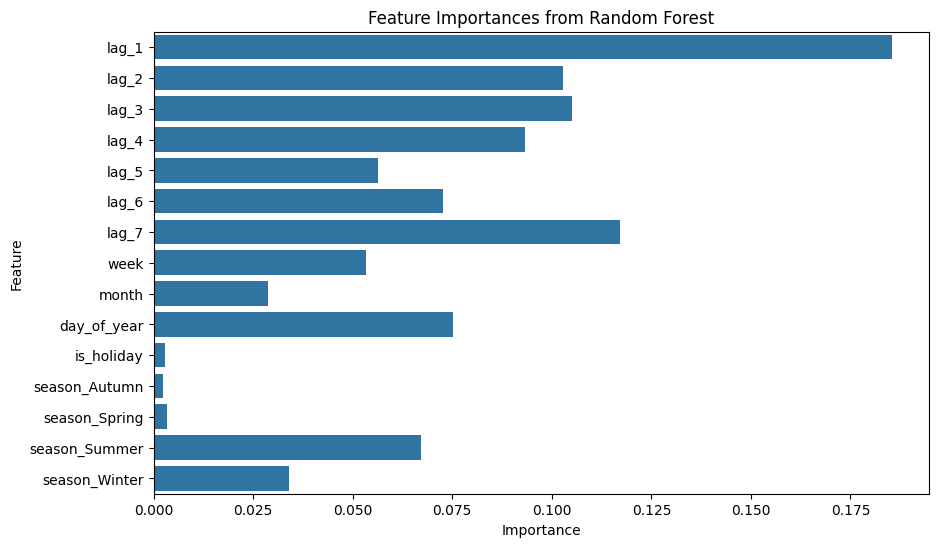

[CV] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.4s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.0s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.0s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.0s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.4s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.0s
[CV] END max_depth=20, max_features=a

In [64]:
importances = search.best_estimator_.feature_importances_
feature_names = X_train.columns

plt.figure(figsize=(10,6))
sns.barplot(x=importances, y=feature_names, orient='h')
plt.title('Feature Importances from Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


In [65]:
import pandas as pd
import numpy as np


importances = search.best_estimator_.feature_importances_
feature_names = X_train.columns


fi_df = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
}).sort_values('importance', ascending=False)
print(fi_df)


          feature  importance
0           lag_1    0.185360
6           lag_7    0.117217
2           lag_3    0.105107
1           lag_2    0.102858
3           lag_4    0.093255
9     day_of_year    0.075174
5           lag_6    0.072604
13  season_Summer    0.067127
4           lag_5    0.056350
7            week    0.053413
14  season_Winter    0.034101
8           month    0.028754
12  season_Spring    0.003276
10     is_holiday    0.002936
11  season_Autumn    0.002468


In [66]:
low_thresh = 0.01
low_imp_features = fi_df[fi_df['importance'] < low_thresh]['feature'].tolist()

print("Low importance features to consider dropping:", low_imp_features)


Low importance features to consider dropping: ['season_Spring', 'is_holiday', 'season_Autumn']


In [68]:
X_train_pruned = X_train.drop(columns=low_imp_features)
X_test_pruned = X_test.drop(columns=low_imp_features)


from sklearn.ensemble import RandomForestRegressor
rf_pruned = RandomForestRegressor(**search.best_params_, random_state=42)
rf_pruned.fit(X_train_pruned, y_train)


y_pred_pruned = rf_pruned.predict(X_test_pruned)

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

rmse = mean_squared_error(y_test, y_pred_pruned) ** 0.5
mae = mean_absolute_error(y_test, y_pred_pruned)
r2 = r2_score(y_test, y_pred_pruned)

print(f'Pruned Features - RMSE: {rmse:.3f}, MAE: {mae:.3f}, R²: {r2:.3f}')


Pruned Features - RMSE: 0.231, MAE: 0.171, R²: 0.489


**Summary of Feature Pruning Process:**
- We used feature importances from Random Forest to identify which variables are most predictive.
- Features contributing less than 1% to model accuracy were marked for removal.
- The model was retrained using only important features, and new performance metrics were compared to the full-feature model.
- If prediction quality remains high or improves, this confirms a simpler and potentially more robust model.
- This process can be repeated as you engineer new features or retrain on new data.


In [72]:
pip install shap --timeout=120 --retries=10


  Using cached shap-0.48.0-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (25 kB)
  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
  Using cached slicer-0.0.8-py3-none-any.whl.metadata (4.0 kB)
  Using cached numba-0.61.2-cp312-cp312-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (2.8 kB)
  Using cached cloudpickle-3.1.1-py3-none-any.whl.metadata (7.1 kB)
  Using cached llvmlite-0.44.0-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.0 kB)
Using cached shap-0.48.0-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.0 MB)
Using cached slicer-0.0.8-py3-none-any.whl (15 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.9/3.9 MB 130.3 kB/s eta 0:00:001m132.4 kB/s eta 0:00:02
Using cached tqdm-4.67.1-py3-none-any.whl (78 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.4/42.4 MB 339.7 kB/s eta 0:00:00m eta 0:00:010:00:04

[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: /home/ani

/home/aniduh/tfenv/lib64/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


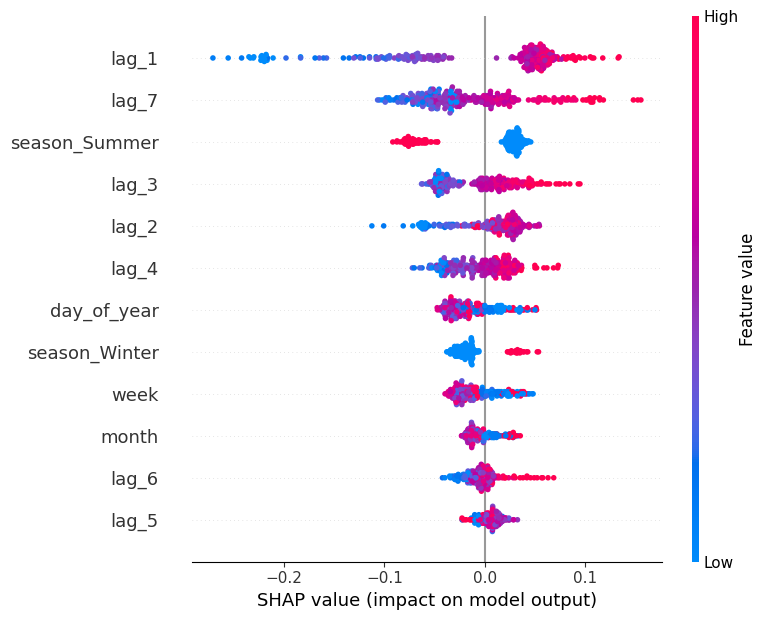

In [73]:
import shap

explainer = shap.TreeExplainer(rf_pruned)
shap_values = explainer.shap_values(X_test_pruned)

# Global interpretability
shap.summary_plot(shap_values, X_test_pruned)

# Individual prediction explanation (first sample)
shap.force_plot(explainer.expected_value, shap_values[0], X_test_pruned.iloc[0])


SHAP plots help you and stakeholders visualize which specific values and features make your model predict higher or lower energy use on any day and solidify trust in your model’s decision-making.

In [75]:
from sklearn.model_selection import TimeSeriesSplit, cross_val_score
from sklearn.ensemble import RandomForestRegressor

tscv = TimeSeriesSplit(n_splits=5)
params = rf_pruned.get_params()
params.pop('random_state', None) 
rf = RandomForestRegressor(**params, random_state=42)
scores = cross_val_score(rf, X, y, cv=tscv, scoring='neg_root_mean_squared_error')
print('TimeSeries CV RMSE:', -scores.mean())


TimeSeries CV RMSE: 0.27762607548397766


Robust, time-aware cross-validation checks that your model’s performance is not “lucky” on just a single test set, but can be trusted over any period.

In [76]:
import pickle
with open('random_forest_best_pruned.pkl', 'wb') as f:
    pickle.dump(rf_pruned, f)


Saved the optimised random forest model and which is ready for integration with api's and chatbot.